# Análise de dados geológicos com python

Projeto realizado através de estudos oferecidos pela Instituição de Ensino Chilena NUBE Minera

https://nubeminera.cl/ em parceria com a empresa de consultoria em Engenharia e Geociencias Geoinnova.

o curso pode ser acessado pelo seguinte endereço https://geoinnova.cl/centro-id/centro-aprendizaje/intro-da-gc-python/


### Inportação da bibliotecas, carregamento e visualização dos dados

In [1]:
import numpy          as np # de manipulação de equações
import pandas         as pd # manipulação de dados
import plotly.express as px # Criação de grágicos interativos
import matplotlib.pyplot as plt

import probscale

import warnings
warnings.filterwarnings("ignore")



In [2]:
# Carregando os dados geológiocos em um dataframe e vizualizando as primeiras linhas
DH = pd.read_csv("datasets/Mod3/db_mineralogia.csv", sep=",")
DH.head()

,East,North,Elevation,bo,cpy,py,alte,mine,dom
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,BTK,CPY,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3


Definimos uma função para plotar os dados das amostras em um gráfico 3d e vizualizar
a distribuição espacial dos pontos

In [112]:
def plot_3d(subs):
    continuous = subs 
    fig= px.scatter_3d(DH, x="East", y="North", z="Elevation", color=continuous, 
                  color_continuous_scale=px.colors.sequential.Jet, 
                  range_color=[0.0, DH[continuous].quantile(0.95)])

    fig.update_traces(marker=dict(size=4.0))
    fig.show()
plot_3d("bo") # Plotando em função da bornita


In [6]:
# distribuição dos dados por categoria
categorical = "alte"
DH[categorical] = DH[categorical].astype(str) 

fig= px.scatter_3d(DH, x="East", y="North", z="Elevation", color=categorical)
fig.update_traces(marker=dict(size=4.0))
fig.show()

# Estatísticas básicas

In [7]:
DH.describe() # Descrição básicas de todas as variáveis

,East,North,Elevation,bo,cpy,py,dom
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,156842.761676,92566.381963,3340.410173,0.140922,1.073958,1.344159,2.814118
std,653.918638,424.794056,250.859647,0.190800,0.561443,1.987731,0.397150
min,155448.723300,91561.040080,2703.210000,0.000000,0.000000,0.000000,1.000000
25%,156390.579000,92203.212280,3190.550000,0.001500,0.715500,0.178000,3.000000
50%,156764.985500,92553.968930,3359.160000,0.058000,0.990000,0.606000,3.000000
75%,157241.014150,92879.356230,3538.835000,0.215000,1.278500,1.618500,3.000000
max,158454.743200,93569.020530,3827.690000,1.661000,6.849000,16.520000,3.000000


In [8]:
(DH["bo"] <= 0).value_counts() 

False    1028
True      247
Name: bo, dtype: int64

In [9]:
DH["bo"][DH["bo"] <=0 ] = np.nan # Subistituindo os valores <=0, por vazio
DH["py"][DH["py"] <=0 ] = np.nan
DH["cpy"][DH["cpy"] <=0 ] = np.nan

In [10]:
(DH["bo"] <= 0).value_counts()

False    1275
Name: bo, dtype: int64

In [11]:
DH.describe()[["bo", "py", "cpy"]].T

,count,mean,std,min,25%,50%,75%,max
bo,1028.0,0.174781,0.198082,0.001,0.015,0.1050,0.27250,1.661
py,1274.0,1.345214,1.988154,0.002,0.178,0.6065,1.61875,16.520
cpy,1274.0,1.074801,0.560856,0.083,0.716,0.9900,1.27875,6.849


In [12]:
stats = DH.describe().T
stats["IQR"] = stats["75%"] - stats["25%"]
stats["95%"] = DH.quantile(0.95)
pd.DataFrame(stats)

,count,mean,std,min,25%,50%,75%,max,IQR,95%
East,1275.0,156842.761676,653.918638,155448.72330,156390.57900,156764.98550,157241.01415,158454.74320,850.43515,158057.117610
North,1275.0,92566.381963,424.794056,91561.04008,92203.21228,92553.96893,92879.35623,93569.02053,676.14395,93330.053921
Elevation,1275.0,3340.410173,250.859647,2703.21000,3190.55000,3359.16000,3538.83500,3827.69000,348.28500,3712.630000
bo,1028.0,0.174781,0.198082,0.00100,0.01500,0.10500,0.27250,1.66100,0.25750,0.575600
cpy,1274.0,1.074801,0.560856,0.08300,0.71600,0.99000,1.27875,6.84900,0.56275,1.995150
py,1274.0,1.345214,1.988154,0.00200,0.17800,0.60650,1.61875,16.52000,1.44075,5.551100
dom,1275.0,2.814118,0.397150,1.00000,3.00000,3.00000,3.00000,3.00000,0.00000,3.000000


## Eststisticas por categoria: (alteração)

In [13]:
stats_alte = DH.groupby(["alte"]).describe()
stats_alte["bo"]

,count,mean,std,min,25%,50%,75%,max
alte,,,,,,,,
ANH,2.0,0.002000,0.001414,0.001,0.00150,0.0020,0.00250,0.003
BTK,679.0,0.230430,0.211801,0.001,0.06300,0.1740,0.35700,1.661
FIL,20.0,0.035000,0.081000,0.001,0.00175,0.0060,0.03125,0.363
HOR,3.0,0.012000,0.005568,0.006,0.00950,0.0130,0.01500,0.017
POT,84.0,0.132333,0.135956,0.001,0.03425,0.1000,0.17300,0.763
PPL,2.0,0.099500,0.127986,0.009,0.05425,0.0995,0.14475,0.190
SCL,235.0,0.047017,0.080377,0.001,0.00200,0.0090,0.05600,0.570
SKR,3.0,0.036333,0.050243,0.002,0.00750,0.0130,0.05350,0.094


####  Distribuição acumulada por categoria: alteração

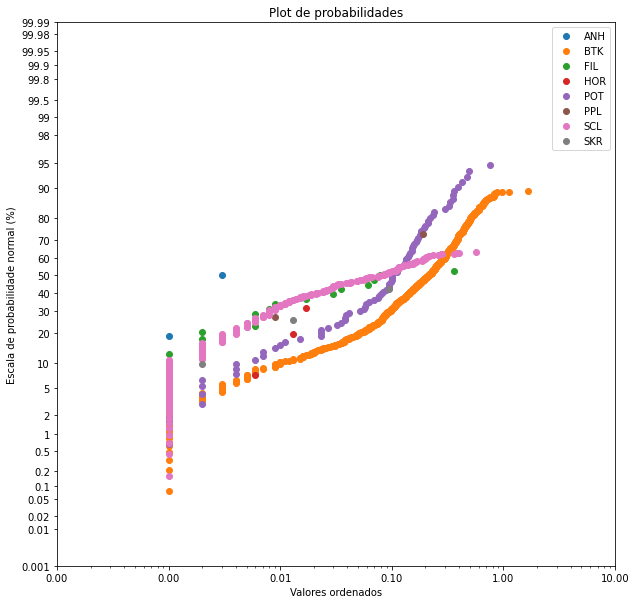

In [113]:
from matplotlib.ticker import ScalarFormatter

def CDF(var): # var = variável de interesse
    
    fig, ax = plt.subplots(figsize=(10,10))
    for category in DH.groupby(var).groups.keys():
        xData = DH.groupby(var).get_group(category)["bo"].sort_values()
        probscale.probplot(xData, ax=ax, probax="y", datascale="log", label=category)
    ax.legend()
    ax.set_ylim(bottom=0.001, top=99.99)
    ax.set_xlim(left=1e-4, right=1e1)
    ax.set_xlabel("Valores ordenados")
    ax.set_ylabel("Escala de probabilidade normal (%)")
    ax.set_title("Plot de probabilidades")
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    plt.show()
    
CDF("alte")

#### Visualização por categoria: alteração

In [115]:
def categoric_plot(var, subs1, subs2, subs3): #

    DH_filter = DH[(DH[var]==subs1)| (DH[var]==subs2)]     # BTK, POT

    fig= px.scatter_3d(DH_filter, x="East", y="North", z="Elevation", color="bo", 
                  color_continuous_scale=px.colors.sequential.Jet, 
                  range_color=[0.0, DH["bo"].quantile(0.95)])
    fig.update_traces(marker=dict(size=4.0))
    fig.show()

    DH_filter = DH[(DH[var]==subs3)] #SCL

    fig= px.scatter_3d(DH_filter, x="East", y="North", z="Elevation", color="bo", 
                  color_continuous_scale=px.colors.sequential.Jet, 
                  range_color=[0.0, DH["bo"].quantile(0.95)])
    fig.update_traces(marker=dict(size=4.0))
    fig.show()
categoric_plot("alte", "BTK", "POT", "SCL")

## Criação e análise de  Unidade Geológica (UG)

In [25]:
DH["UG"] = -99 # Setamos um valor inicial para a variável UG
DH.head()

,East,North,Elevation,bo,cpy,py,alte,mine,dom,UG
0,156911.7393,93193.44188,3827.13,NaN,0.564,1.199,BTK,CPY,3,-99
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3,-99
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3,-99
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3,-99
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3,-99


In [73]:
for index, row in DH.iterrows():
    if row["dom"] != 3:
        DH.loc[index, "UG"] = 1
    if row["dom"] == 3:
        DH.loc[index, "UG"] = 2
        
        if ((row["alte"] == "BTK") or (row["alte"] =="POT")) and (row["mine"] !="BN"):
            DH.loc[index, "UG"] = 3
        if ((row["alte"]== "BTK") or (row["alte"]=="POT")) and (row["mine"]=="BN"):
            DH.loc[index, "UG"] = 4
        
            
DH.head()

,East,North,Elevation,bo,cpy,py,alte,mine,dom,UG
0,156911.7393,93193.44188,3827.13,NaN,0.564,1.199,BTK,CPY,3,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3,4
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3,3


In [75]:
DH["UG"].value_counts()

3    409
4    339
2    294
1    233
Name: UG, dtype: int64

## Eststisticas por categoria: Unidade Geológica "UG"

In [76]:
stats_ug = DH.groupby(["UG"]).describe()
stats_ug["bo"]

,count,mean,std,min,25%,50%,75%,max
UG,,,,,,,,
1,125.0,0.034192,0.065459,0.001,0.00200,0.0060,0.02100,0.360
2,201.0,0.056900,0.087576,0.001,0.00300,0.0140,0.08500,0.570
3,366.0,0.140008,0.156064,0.001,0.03100,0.0935,0.18025,0.880
4,336.0,0.335479,0.211306,0.001,0.18475,0.3080,0.44850,1.661


####  Distribuição acumulada por categoria: UG

In [77]:
def probplot(var): #var = variável de interesse que se deseja plotar
    fig, ax = plt.subplots(figsize=(10,10))
    for category in DH.groupby(var).groups.keys():
        xData = DH.groupby(var).get_group(category)["bo"].sort_values()
        probscale.probplot(xData, ax=ax, probax="y", datascale="log", label=category)
    ax.legend()
    ax.set_ylim(bottom=0.001, top=99.99)
    ax.set_xlim(left=1e-4, right=1e1)
    ax.set_xlabel("Valores ordenados")
    ax.set_ylabel("Escala de probabilidade normal (%)")
    ax.set_title("Plot de probabilidades")
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    plt.show()

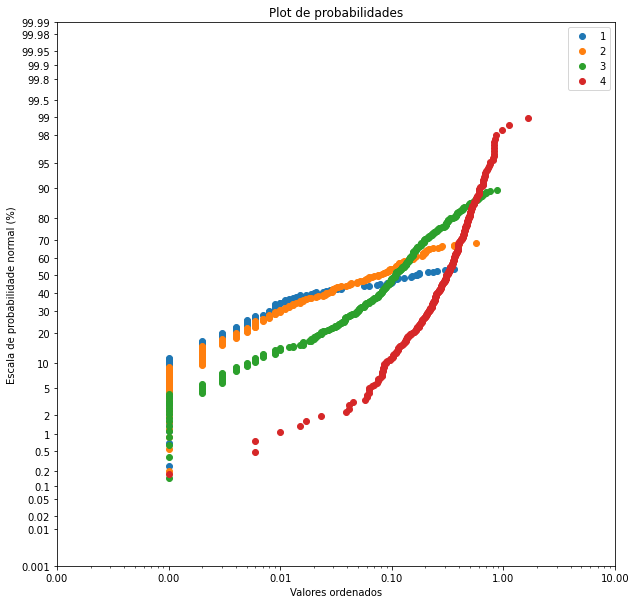

In [78]:
probplot("UG")

#### Visualização por categoria: domínio

In [79]:
DH["UG"] = DH["UG"].astype(str)

fig = px.scatter_3d(DH, x="East", y="North", z="Elevation", color="UG" )
fig.update_traces(marker=dict(size=4.0))
fig.show()

## Validação da Unidade Geológica

#### Histograma da variável "bo" por "UG"

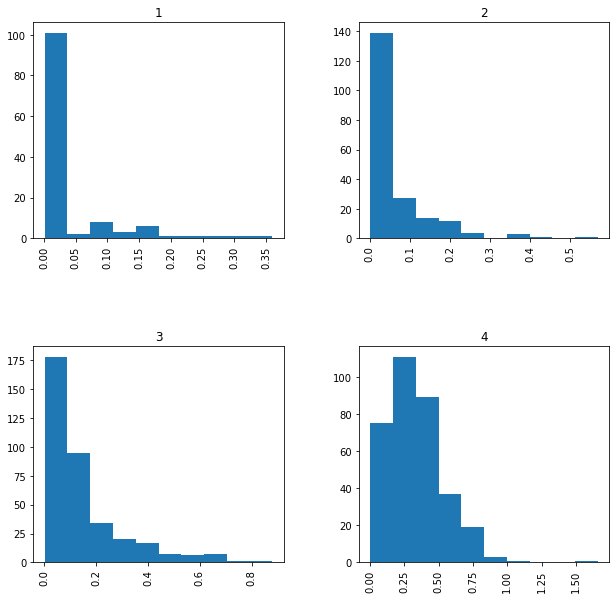

In [97]:
DH.hist(column="bo", by="UG", figsize=(10,10))
plt.show()

#### boxplot

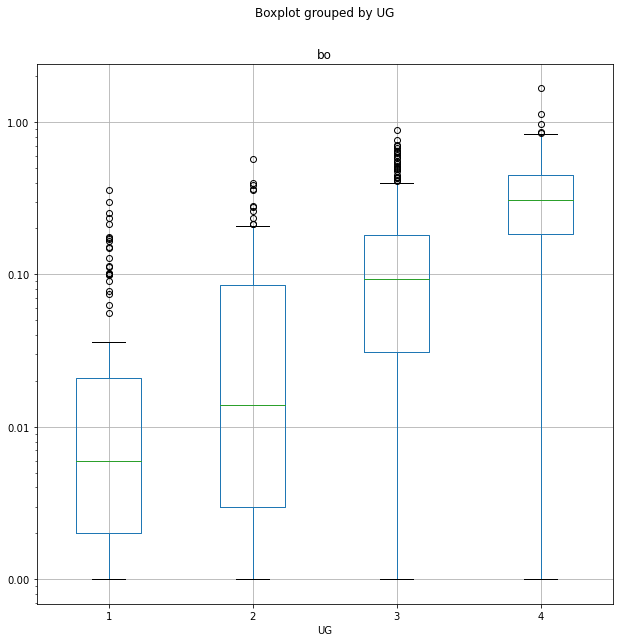

In [101]:
DH.boxplot(column="bo", by="UG", figsize=(10,10))
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(ScalarFormatter())


#### Média VS Desvio padrão

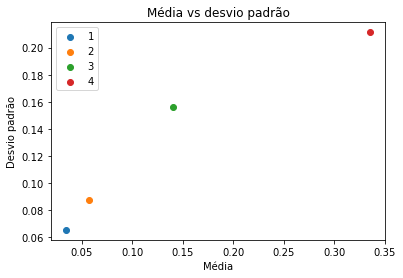

In [107]:
stats_ug = DH.groupby(["UG"]).describe()
fig, ax = plt.subplots()
for ug in DH.groupby("UG").groups.keys():
    ax.scatter(stats_ug["bo"]["mean"][ug],
              stats_ug["bo"]["std"][ug], label=ug)
ax.set_title("Média vs desvio padrão")
ax.set_ylabel("Desvio padrão")
ax.set_xlabel("Média")
plt.legend()
plt.show()

#### Matriz de correlação

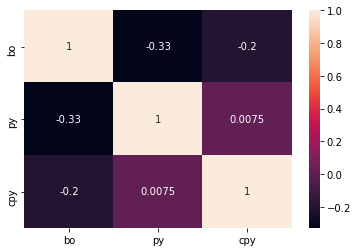

In [126]:
import seaborn as sns
corr_matrix = DH[["bo", "py", "cpy"]].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()